<a href="https://colab.research.google.com/github/finardi/WatSpeed_LLM_foundation/blob/main/Module2%3A%20Fine_tuning_T5_for_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 - Fine-tuning T5 for sentiment analysis

This notebook presents an example of **how fine-tune T5** to perform sentiment analysis. Sentiment analysis, also referred to as opinion mining, is a type of text classification task in Natural Language Processing (NLP) that involves categorizing a piece of text, typically a sentence or a document, into predefined sentiment categories, such as positive, negative, or neutral.

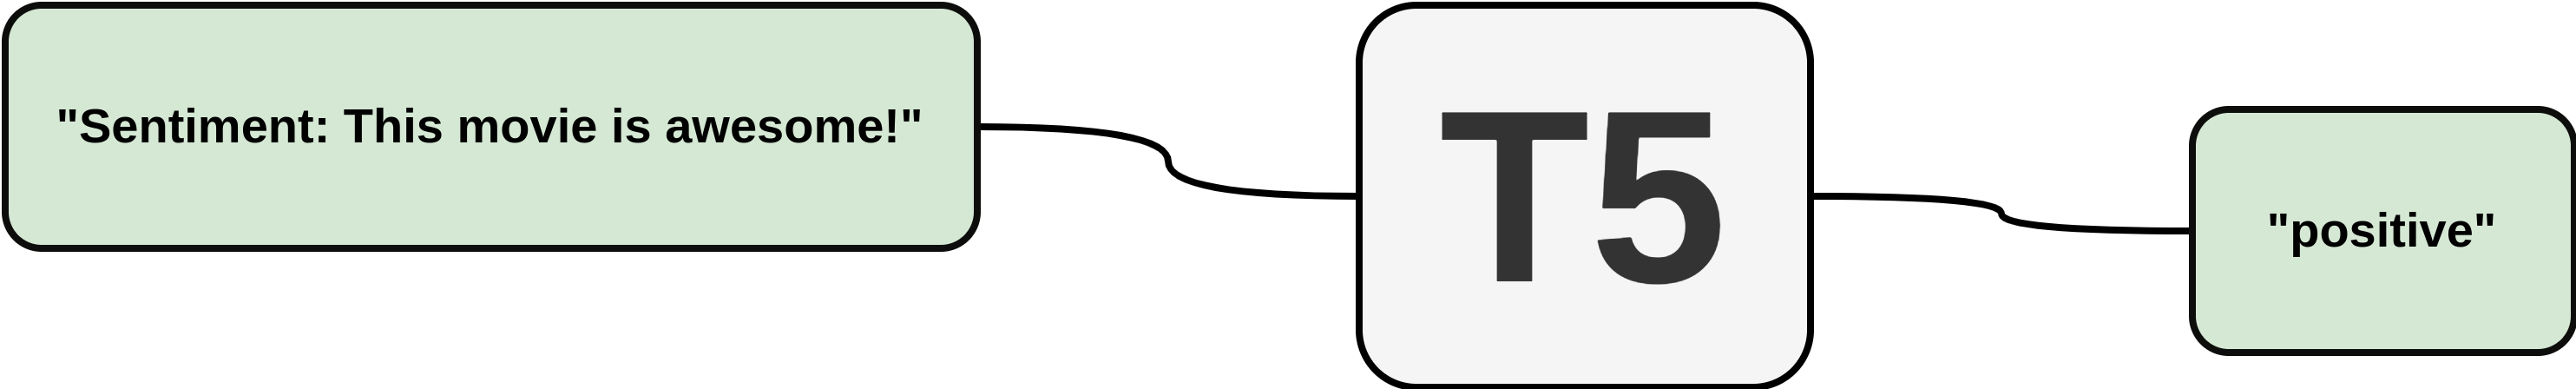

T5 is a powerful deep learning model pre-trained on massive amounts of text data. T5 is a type of transformer-based architecture that can generate outputs by taking input in the form of natural language text.

We can fine-tune a pre-trained T5 model on a labeled sentences dataset with their corresponding sentiment categories to use T5 for sentence classification. The fine-tuning process involves training the T5 model on our specific task by feeding it our labeled dataset and adjusting its parameters to improve its performance.

In this example, we fine-tune a T5 model on the Stanford Sentiment Treebank (SST-2). The model and the dataset are available online:

* [t5-base](https://huggingface.co/t5-base)
* [Dataset](https://huggingface.co/datasets/glue/viewer/sst2/test)

# Installing required packages

In this example, we have to install three libraries:  `transformers`, `datasets`, and `sentencepiece`, all from Hugging Face. [Hugging Face](https://huggingface.co/) is an AI startup that has gained significant traction in the NLP community recently. It provides a suite of open-source tools and libraries, making it easy for developers and researchers to work with state-of-the-art NLP models.

**`transformers`**:

Transformers is an open-source library for NLP developed by Hugging Face. It provides state-of-the-art pre-trained models for various NLP tasks, such as text classification, sentiment analysis, question-answering, named entity recognition, etc. The library is built on top of PyTorch and TensorFlow and provides easy-to-use interfaces to access pre-trained models and fine-tune them on specific tasks. The library also provides tools for training custom models and sharing them with the community.

**`datasets`**:

Datasets is another open-source library developed by Hugging Face that provides a collection of preprocessed datasets for various NLP tasks, such as sentiment analysis, natural language inference, machine translation, and many more. The library provides a unified API to access these datasets, making it easy to load, process, and analyze them.

**`sentencepiece`**:

Sentencepiece is an open-source library developed by Google for subword text processing. It is an unsupervised learning method that constructs a fixed-size vocabulary of subword units for a given language corpus. Sentencepiece enables the generation of a custom tokenization scheme that divides text into smaller subword units, which can better handle rare words and out-of-vocabulary words than traditional word-based tokenization.





In [ ]:
!pip install transformers --upgrade
!pip install datasets
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.7 MB/s eta 0:00:0

# Setting the device

In this example, we will use a GPU to speed up the processing of our model. GPUs (Graphics Processing Units) are specialized processors that are optimized for performing large-scale computations in parallel. By using a GPU, we can accelerate the training and inference of a machine learning model, which can significantly reduce the time required to complete these tasks.

Before we begin, we need to check whether a GPU is available and select it as the default device for our PyTorch operations. This is because PyTorch can use either a CPU or a GPU to perform computations, and by default, it will use the CPU. 

For using a GPU in Google Colab: 
1. Click on the "Runtime" menu at the top of the screen.
2. From the dropdown menu, click on "Change runtime type".
3. In the popup window that appears, select "GPU" as the hardware accelerator.
4. Click on the "Save" button.

That's it! Now you can use the GPU for faster computations in your notebook. 

In [ ]:
!nvidia-smi

Tue May  9 12:40:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch

if torch.cuda.is_available(): 
   dev = "cuda:0"
else: 
   dev = "cpu"
device = torch.device(dev)
print('Using {}'.format(device))

Using cuda:0


# Downloading Dataset

The SST-2 dataset, or the Stanford Sentiment Treebank, is popular for sentiment analysis tasks in Natural Language Processing (NLP). It consists of movie reviews from the Rotten Tomatoes website that are labeled with either a positive or negative sentiment. The dataset contains 10,662 sentence-level movie reviews, with approximately half of the reviews labeled as positive and the other half labeled as negative. The reviews are also relatively evenly distributed in length, with a median length of 18 tokens.

The SST-2 dataset has become a benchmark dataset for sentiment analysis in NLP, and many researchers use it to evaluate the performance of their models. The dataset's popularity is partly due to its high-quality labels and the task's relative simplicity, making it an accessible starting point for researchers and developers new to NLP.

In this example, we're using the **`datasets`** library to download and load the validation set of the dataset.

In [ ]:
from datasets import load_dataset

train_dataset = load_dataset('sst2', split='train')
val_dataset = load_dataset('sst2', split='validation')

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset sst2 downloaded and prepared to /root/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5. Subsequent calls will reuse this data.


In [ ]:
train_dataset = train_dataset.map(lambda examples: {'labels': ["positive" if label==1 else "negative" for label in examples['label']]}, batched=True)
val_dataset = val_dataset.map(lambda examples: {'labels': ["positive" if label==1 else "negative" for label in examples['label']]}, batched=True)

train_dataset = train_dataset.remove_columns(['label'])
val_dataset = val_dataset.remove_columns(['label'])

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In the code below, we use the **`pandas`** library to import the SST-2 dataset and show the first 10 examples using the **`df.head(10)`** method. The dataset contains examples labeled as either 0 or 1, representing negative and positive, respectively. For instance, the first example is labeled as 1, which means it is a positive example. It reads "it's a charming and often affecting journey," while the second example is labeled as 0, meaning it is a negative example. It reads "unflinchingly bleak and desperate." 
This way, you can have a quick overview of the dataset and its labeling.

In [ ]:
import pandas as pd

df = pd.DataFrame(train_dataset)
df.head(10)

,idx,sentence,labels
0,0,hide new secretions from the parental units,negative
1,1,"contains no wit , only labored gags",negative
2,2,that loves its characters and communicates som...,positive
3,3,remains utterly satisfied to remain the same t...,negative
4,4,on the worst revenge-of-the-nerds clichés the ...,negative
5,5,that 's far too tragic to merit such superfici...,negative
6,6,demonstrates that the director of such hollywo...,positive
7,7,of saucy,positive
8,8,a depressed fifteen-year-old 's suicidal poetry,negative
9,9,are more deeply thought through than in most `...,positive


# Downloading the model

We use the **`transformers`** library to load a sentiment analysis model using the T5 language model. The library provides two important classes for this task: **`T5Tokenizer`** and **`T5ForConditionalGeneration`**.

The **`T5Tokenizer`** class is used to tokenize input text data. It is initialized with a pre-trained tokenizer, in this case "`t5-base`", trained on a large corpus of diverse text.

The **`T5ForConditionalGeneration`** class is used to load a pre-trained T5 model, available through the "`t5-base`" identifier.

In [ ]:
# Tokenizer 
from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM

model_name = "t5-base"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


# Model fine-tuning

## Data preparation

To fine-tune T5 for sentiment analysis, we use the SST-2 dataset as a benchmark. Before training, we need to prepare the dataset by tokenizing the data and converting it to a format that can be processed by the model.

To fine-tune the T5 model for sentiment analysis, we first define a maximum input length of 128 and a maximum target length of 2. We then create a preprocess function, which tokenizes the data and converts it to a format that can be processed by the model. The function takes examples as input and extracts the input sentences. The tokenizer is then applied to the inputs, and the resulting tokenized inputs are stored in a PyTorch tensor. 

In the T5 model, the special `<eos>` (end of sequence) token is added to the end of the target sequence during training to signify the end of the output sequence. Therefore, the `max_target_length` parameter needs to account for this additional token, which is why it is set to `2` when the target label is a unique word such as "negative" or "positive". 

We then convert the labels from a binary to a text format, where 1 is mapped to "positive" and 0 is mapped to "negative". The tokenizer is applied to the encoded labels, and the resulting tokenized labels are stored in a PyTorch tensor.

We use the `map` method of the Hugging Face `Dataset` class to apply the preprocess function to the training, validation, and test datasets, which are already loaded in memory. The resulting tokenized datasets are stored in `train_tokenized_datasets`, `val_tokenized_datasets`, and `test_tokenized_datasets`, respectively. The `batched` argument is set to `True` to ensure that the preprocessing is done in batches, which helps to speed up the process.

In [ ]:
max_input_length = 128
max_target_length= 2
def preprocess_function(examples,encode_labels=False):
    inputs = [doc for doc in examples["sentence"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True, padding="max_length", return_tensors="pt")
    
    encoded_labels = tokenizer(examples["labels"], max_length=max_target_length, truncation=True, padding="max_length", return_tensors="pt")
    model_inputs["labels"] = encoded_labels["input_ids"]
  
    return model_inputs

train_tokenized_datasets = train_dataset.map(lambda examples: preprocess_function(examples,encode_labels=True), batched=True,)
val_tokenized_datasets = val_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

The **`set_format()`** method is called on the dataset object to convert the dataset to the PyTorch tensor format, which is required by the T5 model.

The columns argument specifies which columns in the dataset should be included in the PyTorch format. In this case, the **`input_ids`**, **`attention_mask`**, and **`labels`** columns are included. These columns correspond to the inputs and labels that the T5 model expects for sequence classification tasks.

In [ ]:
train_tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask',"labels"])

## Compute metrics

The code below defines a function named **`compute_metrics`** that takes as input a tuple called **`eval_pred`**. This tuple contains two arrays: **`logits`** and **`labels`**. The **`logits`** array contains the predicted scores for each class for each example in the evaluation dataset, while the **`labels`** array contains the true labels for each example in the evaluation dataset.

First, the code checks if the **`logits`** array is a tuple, indicating that it's a sequence-to-sequence model's output. If it is, the function extracts the first element of the tuple to obtain the predicted scores for each class.

Next, the function computes the predicted labels for each example by taking the class with the highest score, which corresponds to the **`argmax`** along the last axis of the **`logits`** array.

Then, the function decodes the predicted and true labels using the **`tokenizer.batch_decode`** function, which decodes a batch of tokenized sentences into a list of strings.

Finally, the function computes the accuracy and F1 score between the decoded predicted and true labels using the **`accuracy_score`** and **`f1_score`** functions from the **`sklearn.metrics`** module. 

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    if isinstance(logits, tuple):
        logits = logits[0]
    predictions = logits.argmax(axis=-1)
    
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    accuracy = accuracy_score(decoded_labels, decoded_preds)
    f1 = f1_score(decoded_labels, decoded_preds, pos_label="positive", average="weighted")
    
    return {"accuracy":accuracy,"f1":f1}

## Training

In this section, we perform the training step of the fine-tuning process. The code below defines several hyperparameters and settings that will be used during training.

- **`BATCH_SIZE`** determines the number of examples processed in each batch during training. In this case, it is set to 96. See more about how to determine the right batch size [here](https://medium.com/data-science-365/determining-the-right-batch-size-for-a-neural-network-to-get-better-and-faster-results-7a8662830f15).
- **`NUMBER_OF_EPOCHS`** specifies the number of times the model will go through the entire training dataset. In this case, it is set to 5.
- **`LEARNING_RATE`** This variable sets the learning rate for the optimizer used during training. The learning rate determines how much the weights of the model are updated during training. A high learning rate can cause the model to converge too quickly and potentially miss the optimal solution, while a low learning rate can cause slow convergence or prevent the model from finding a good solution. Read more about how to choose the learning rate [here](https://www.baeldung.com/cs/ml-learning-rate#how-to-choose-the-learning-rate).
- **`LOGS_DIR`** specifies the directory where the logs of the training process will be stored.
- **`GRADIENT_ACCUMULATION_STEPS`** determines the number of batches to accumulate gradients before updating the model parameters. This is useful when the batch size is limited by memory constraints. In this case, it is set to 4.
- **`USE_FP16`** specifies whether to use 16-bit precision during training. This can be used to speed up training and reduce memory usage, but it may also lead to lower precision. In this case, it is set to `True`.
- **`OUTPUT_DIR`** specifies the directory where the fine-tuned model will be saved after training. In this case, it is set to "./t5-base-sst-2".


In [ ]:
BATCH_SIZE = 96
NUMBER_OF_EPOCHS = 5
LEARNING_RATE = 1e-4
LOGS_DIR= "./logs"
GRADIENT_ACCUMULATION_STEPS = 4
USE_FP16 = True
OUTPUT_DIR = "./t5-base-sst-2"

The code below defines a TrainingArguments object that will be used to configure the fine-tuning process. 
 
- `logging_steps` specifies how often the logs will be printed during training. 
- `do_train` and `do_eval` are boolean flags indicating whether to perform training and evaluation, respectively. 
- `no_cuda` is a boolean flag indicating whether to use the GPU for training. 
- `load_best_model_at_end` is a boolean flag indicating whether to load the best model at the end of training. 
- `evaluation_strategy` sets how often to perform evaluation during training. In this case, we evaluate at the end of each epoch. 
- `save_strategy` sets how often to save the model during training. In this case, we save at the end of each epoch. 
- `fp16` is a boolean flag indicating whether to use mixed precision training, which can reduce memory usage and speed up training. 
- `metric_for_best_model` specifies which metric to use to determine the best model. In this case, we use accuracy.

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir=OUTPUT_DIR,
    learning_rate=LEARNING_RATE,
    num_train_epochs=NUMBER_OF_EPOCHS,              
    per_device_train_batch_size=BATCH_SIZE,                #batch size per device during training
    per_device_eval_batch_size=BATCH_SIZE,                #batch size for evaluation
    logging_dir=LOGS_DIR,            
    logging_steps=100,
    do_train=True,
    do_eval=True,
    no_cuda=False,
    load_best_model_at_end=True,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    fp16=USE_FP16,
    gradient_accumulation_steps=GRADIENT_ACCUMULATION_STEPS,
    metric_for_best_model='accuracy'
)

In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

This code belows defines the **`Trainer`** object from the **`transformers`** library that will be used to fine-tune the pre-trained BERT model on the SST-2 dataset. 

The **`Trainer`** takes in several parameters:

- **`model`**: the T5 model we want to fine-tune
- **`args`**: the training arguments defined earlier, which specify how we want to fine-tune the model
- **`train_dataset`**: the dataset containing the training examples
- **`eval_dataset`**: the dataset containing the validation examples
- **`compute_metrics`**: the function that computes the evaluation metrics for the model during training

With these parameters, the **`Trainer`** object is ready to be used to fine-tune the T5 model on the SST-2 dataset.

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_tokenized_datasets,         
    eval_dataset=val_tokenized_datasets,   
    data_collator=data_collator,         
    compute_metrics=compute_metrics
)

The **`trainer.train()`** method is used to train the model on the provided training dataset for the specified number of epochs and other training arguments specified in ***training_args***.

When **`trainer.train()`** is executed, the training will start and progress will be displayed in the output cell. The output will show the current epoch, the current step, the current learning rate, and the training loss. 

At the end of the training, the **`train()`** method will return a **`TrainOutput`** object which contains the global step, training loss, and other metrics collected during training.





In [ ]:
train_out = trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1
0,1.268100,0.100326,0.928899,0.928832


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


You can save the best model from the trainer using the **`save_model()`** method of the **`Trainer`** class. This method saves the model and the associated tokenizer to the specified directory.



In [ ]:
FINAL_MODEL_DIR = './my-t5-base-sst2'
trainer.save_model(FINAL_MODEL_DIR)

## Looking inside the training loop.

**The execution of the cell below is optional.**

It shows an example of how you can do the fine-tuning of T5 using a loop, without using Hugging Face's Trainer.

In this code, we first define the optimizer and then loop over the epochs. For each epoch, we loop over the batches in the training dataset, compute the loss and gradients, and update the parameters of the model using the optimizer. After training on the entire training dataset, we evaluate the model on the validation dataset by looping over the batches and computing the accuracy. Finally, we print the average train loss and eval accuracy for the epoch.


In [ ]:
%%script echo skipping 
# If you want to run this cell, remove the line above.

from transformers import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)  # Initialize AdamW optimizer with given learning rate.

model.to(device)  # Move the model to the specified device.

BATCH_SIZE = 64 # training this way may require a smaller batch size

for epoch in range(NUMBER_OF_EPOCHS): # Loop over the number of epochs.
    # train
    train_loader = DataLoader(train_tokenized_datasets, batch_size=BATCH_SIZE, shuffle=True)  # Create a DataLoader for the training dataset with given batch size.
    model.train()  # Set the model in training mode.
    total_loss = 0.0
    for batch in tqdm(train_loader): # Loop over batches in the training data.
        optimizer.zero_grad()  # Clear gradients from previous iteration.
        input_ids = batch['input_ids'].to(device)  # Move the input_ids tensor to the specified device.
        attention_mask = batch['attention_mask'].to(device)  # Move the attention_mask tensor to the specified device.
        labels = batch['labels'].to(device)  # Move the labels tensor to the specified device.
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels) # Forward pass through the model and compute the loss.
        loss = outputs.loss  # Retrieve the computed loss.
        loss.backward()  # Compute gradients of the loss with respect to model parameters.
        total_loss += loss.item()  # Add the current batch loss to the total loss.
        optimizer.step()  # Update the parameters based on computed gradients.

    avg_train_loss = total_loss / len(train_loader)  # Compute the average training loss for the epoch.
    print(f"Epoch {epoch+1} - average train loss: {avg_train_loss}")
    
    # evaluate
    eval_loader = DataLoader(val_tokenized_datasets, batch_size=BATCH_SIZE, shuffle=False)  # Create a DataLoader for the validation dataset with given batch size.
    model.eval()  # Set the model in evaluation mode.
    total_eval_accuracy = 0.0
    for batch in tqdm(eval_loader):  # Loop over batches in the validation data.
        input_ids = batch['input_ids'].to(device)  # Move the input_ids tensor to the specified device.
        attention_mask = batch['attention_mask'].to(device)  # Move the attention_mask tensor to the specified device.
        labels = batch['labels'].to(device)  # Move the labels tensor to the specified device.
        with torch.no_grad():  # Disable gradient computation for validation.
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)  # Forward pass through the model and compute the logits.
        logits = outputs.logits  # Retrieve the logits from the model output.
        predictions = logits.argmax(axis=-1)
        decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
        accuracy = accuracy_score(decoded_labels, decoded_preds)
        total_eval_accuracy += accuracy  # Compute the number of correct predictions and add to the total evaluation accuracy.
    avg_eval_accuracy = total_eval_accuracy / len(val_tokenized_datasets)  # Compute the average evaluation accuracy for the epoch.
    print(f"Epoch {epoch+1} - average eval accuracy: {avg_eval_accuracy}")


# Test your fine-tuned model

To load the fine-tuned model from checkpoints and use it, you can follow the steps below:

1. Load the trained model using the **`T5ForConditionalGeneration`** class from transformers library.

In [ ]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(FINAL_MODEL_DIR)

2. Load the tokenizer used for the fine-tuning process:

In [ ]:
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained('t5-base')

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


3. Encode your input text using the tokenizer :

In [ ]:
text = "This movie is awesome!" # @param
inputs = tokenizer(text, max_length=128, truncation=True, return_tensors="pt")

4. Pass the input to the model and get the predicted label:

In [ ]:
outputs = model.generate(**inputs)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


5. Parse the output:

In [ ]:
output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"The sentence '{text}' is classified as '{output_text}'.")

The sentence 'This movie is awesome!' is classified as 'positive'.
